# House Prices - Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

# 0. recuperare il dataset (da internet o da locale)
# 1. feature selection (principal component analysis)
# 2. Suddivisione training e testing
# 3. Model selection con K-fold cross validation
# 4. Training (Tuning iperparametri) con k-fold cross validation
# 5. Valutare il modello con il testing set
# 6. Scegliere il metodo di score (R^2)
# 7. Fare dei grafici, vedendo anche da come li ha fatti il professore e spiegarli.
# Bagging, Boosting (Gradient Boosting) e altro

In [1]:
from code.grafici import Grafici
from code.models import Model
from code.dataset import HouseDataset

dataset = HouseDataset(preprocessing=True)
model = Model(dataset)
plot = Grafici(model)

81
80


81
80


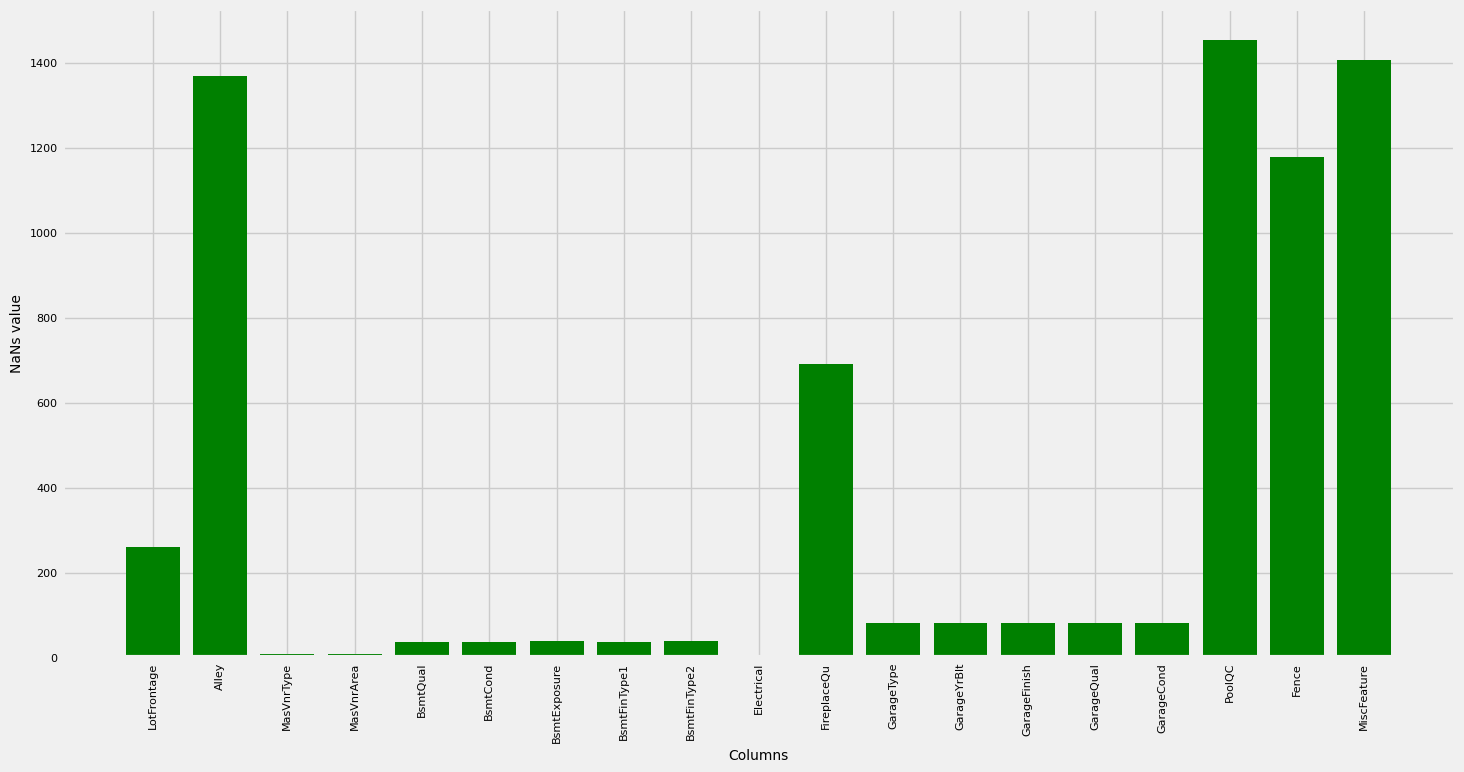

In [2]:
from code.grafici import check_nan_value

dataset_no_processing = HouseDataset(preprocessing=False)
check_nan_value(dataset_no_processing.train)

MSE: 437613104.338


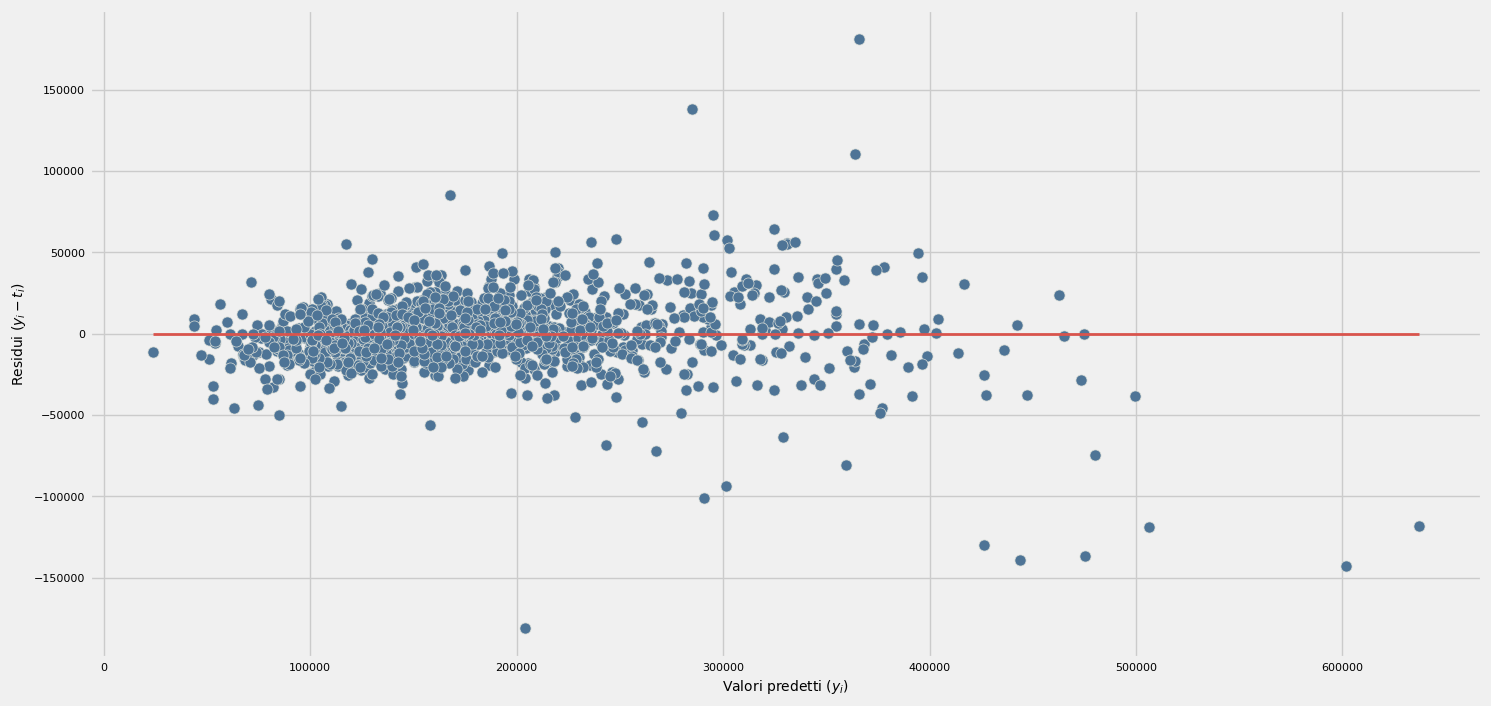

In [5]:
model.linear_regression()
plot.linear_regression_plot()

In [2]:
import torch
import torch.nn as nn
import numpy as np
from dataset import HouseDataset
from sklearn.feature_selection import SelectKBest, f_regression


# Load Boston Housing dataset
boston = HouseDataset()
X, y = boston.data, boston.target

# Select top 5 features using f_regression
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Convert data to PyTorch tensors
X_new = torch.from_numpy(X_new).float()
y = torch.from_numpy(y).float()

# Define the model
model = nn.Linear(X_new.shape[1], 1)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_new)
    loss = criterion(outputs, y.view(-1, 1))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss for every 100th epoch
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



AttributeError: 'HouseDataset' object has no attribute 'data'

In [1]:
from dataset import HouseDataset


boston = HouseDataset()
print(boston.get_features())
print(boston.get_target())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
import pandas as pd

# creazione di un DataFrame di esempio
df = pd.DataFrame({'colore': ['rosso', None, 'verde', 'rosso'], 'taglia': ['S', 'M', 'L', 'M']})

# sostituire i valori mancanti con il valore più comune di ogni colonna
df = df.fillna(df.mode().iloc[0]) # la moda è il valore più comune

# applicare il One Hot Encoding alle colonne categoriche
encoded_df = pd.get_dummies(df)

# aggiungere il prefisso al nome delle colonne
prefix_dict = {col: f"{col}_{val}" for col in df.columns for val in df[col].unique()}
encoded_df = encoded_df.add_prefix('').rename(columns=prefix_dict)

# visualizzare il nuovo DataFrame con i nomi delle colonne aggiunti
print(encoded_df)

   colore_rosso  colore_verde  taglia_L  taglia_M  taglia_S
0             1             0         0         0         1
1             1             0         0         1         0
2             0             1         1         0         0
3             1             0         0         1         0


In [8]:
import pandas as pd

# creazione di un DataFrame di esempio
df = pd.DataFrame({
    'colonna_categorica_1': ['valore_1', 'valore_2', None, 'valore_1'],
    'colonna_categorica_2': ['valore_3', None, 'valore_4', 'valore_3'],
    'colonna_numerica_1': [1, 2, 3, 4],
    'colonna_numerica_2': [5, 6, None, 8]
})

# identificare le colonne categoriche e numeriche
categoriche = df.select_dtypes(include='object').columns
numeriche = df.select_dtypes(include='number').columns

# sostituire i valori nulli con la moda per le colonne categoriche
df[categoriche] = df[categoriche].fillna(df[categoriche].mode().iloc[0])

# sostituire i valori nulli con la media per le colonne numeriche
df[numeriche] = df[numeriche].fillna(df[numeriche].mean())

# visualizzare il nuovo DataFrame
print(df)


  colonna_categorica_1 colonna_categorica_2  colonna_numerica_1  \
0             valore_1             valore_3                   1   
1             valore_2             valore_3                   2   
2             valore_1             valore_4                   3   
3             valore_1             valore_3                   4   

   colonna_numerica_2  
0            5.000000  
1            6.000000  
2            6.333333  
3            8.000000  
